# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib.request,urllib.parse,urllib.error
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [3]:
weather_api_key

'948bbffcf941a998c40a2e78fef5f28b'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cities

['vostok',
 'rawson',
 'mar del plata',
 'gualeguaychu',
 'cockburn town',
 'tumannyy',
 'hilo',
 'cherskiy',
 'hobart',
 'illoqqortoormiut',
 'sitka',
 'bambous virieux',
 'albany',
 'buchanan',
 'rikitea',
 'arraial do cabo',
 'bengkalis',
 'vaini',
 'pevek',
 'taolanaro',
 'cabo san lucas',
 'saint-philippe',
 'svetlogorsk',
 'hasaki',
 'povoa de varzim',
 'belushya guba',
 'constitucion',
 'kristiansund',
 'rosarito',
 'kiama',
 'lebu',
 'kapaa',
 'taoudenni',
 'upernavik',
 'brownsburg',
 'norman wells',
 'gorontalo',
 'bluff',
 'ushuaia',
 'sorland',
 'busselton',
 'revelstoke',
 'barrow',
 'klyuchi',
 'punta arenas',
 'geraldton',
 'bethel',
 'jiuquan',
 'hami',
 'naze',
 'ahuimanu',
 'camopi',
 'zhigansk',
 'husavik',
 'sentyabrskiy',
 'qaanaaq',
 'beruwala',
 'vestmannaeyjar',
 'barao de melgaco',
 'kadykchan',
 'sokolac',
 'toliary',
 'centralia',
 'mount gambier',
 'cloquet',
 'severo-kurilsk',
 'namatanai',
 'korla',
 'butaritari',
 'samarai',
 'kelowna',
 'halalo',
 'te an

In [5]:
#set counts for printing of records
count = 0
group = 1
city_list = []

#create loop for data to generate dataframe
print("------------------------------\nBegin Data Retrieval\n------------------------------\n")

for city in cities:
    count += 1
    
    print(f"Processing record {count} of Set {group} | {city}")
    
    if count == 50:
        count = 0
        group += 1
   
    url= f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=Imperial"
    response = requests.get(url).json()
    print(response)
    
    try:
        city_list.append({
            'City': city,
            'Lat': response['coord']['lat'],
            'Lon':response['coord']['lon'],
            'Maximum Temp': response['main']['temp_max'],
            'Humidity': response['main']['humidity'],
            'Cloudiness': response['clouds']['all'],
            'Wind': response['wind']['speed'],
            'Country': response['sys']['country'],
            'Date': response['dt']
        })
    
    except Exception:
        print("City not found. Skipping...")
        pass
print("------------------------------\nRetrieval of Data: Completed\n------------------------------")

------------------------------
Begin Data Retrieval
------------------------------

Processing record 1 of Set 1 | vostok
{'coord': {'lon': 135.8833, 'lat': 46.4856}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 50.63, 'feels_like': 49.24, 'temp_min': 50.63, 'temp_max': 50.63, 'pressure': 1011, 'humidity': 82, 'sea_level': 1011, 'grnd_level': 942}, 'visibility': 10000, 'wind': {'speed': 3.49, 'deg': 205, 'gust': 5.19}, 'clouds': {'all': 99}, 'dt': 1623012017, 'sys': {'country': 'RU', 'sunrise': 1623006288, 'sunset': 1623062763}, 'timezone': 36000, 'id': 2013279, 'name': 'Vostok', 'cod': 200}
Processing record 2 of Set 1 | rawson
{'coord': {'lon': -65.1023, 'lat': -43.3002}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 51.62, 'feels_like': 48.65, 'temp_min': 51.62, 'temp_max': 51.62, 'pressure': 1012, 'humidity': 46, '

{'coord': {'lon': -175.2, 'lat': -21.2}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 77.16, 'feels_like': 78.24, 'temp_min': 77.16, 'temp_max': 77.16, 'pressure': 1012, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 12.66, 'deg': 40}, 'clouds': {'all': 40}, 'dt': 1623012023, 'sys': {'type': 1, 'id': 7285, 'country': 'TO', 'sunrise': 1623089614, 'sunset': 1623128775}, 'timezone': 46800, 'id': 4032243, 'name': 'Vaini', 'cod': 200}
Processing record 19 of Set 1 | pevek
{'coord': {'lon': 170.3133, 'lat': 69.7008}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 47.03, 'feels_like': 41.41, 'temp_min': 47.03, 'temp_max': 47.03, 'pressure': 1001, 'humidity': 69, 'sea_level': 1001, 'grnd_level': 996}, 'visibility': 10000, 'wind': {'speed': 12.88, 'deg': 171, 'gust': 21.09}, 'clouds': {'all': 44}, 'dt': 1623012023, 'sy

{'coord': {'lon': -56.1549, 'lat': 72.7868}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 37.96, 'feels_like': 35.62, 'temp_min': 37.96, 'temp_max': 37.96, 'pressure': 1011, 'humidity': 85, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 3.38, 'deg': 75, 'gust': 3.78}, 'clouds': {'all': 68}, 'dt': 1623012029, 'sys': {'country': 'GL', 'sunrise': 0, 'sunset': 0}, 'timezone': -7200, 'id': 3418910, 'name': 'Upernavik', 'cod': 200}
Processing record 35 of Set 1 | brownsburg
{'coord': {'lon': -86.3978, 'lat': 39.8434}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 80.56, 'feels_like': 82.63, 'temp_min': 78.48, 'temp_max': 83.95, 'pressure': 1014, 'humidity': 61}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 191, 'gust': 17}, 'clouds': {'all': 75}, 'dt': 1623011985, 'sys': {'type': 2, 'id': 20094

{'coord': {'lon': 98.5174, 'lat': 39.7432}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 59.95, 'feels_like': 56.73, 'temp_min': 59.95, 'temp_max': 59.95, 'pressure': 1011, 'humidity': 23, 'sea_level': 1011, 'grnd_level': 853}, 'visibility': 10000, 'wind': {'speed': 7.31, 'deg': 10, 'gust': 7.63}, 'clouds': {'all': 5}, 'dt': 1623012034, 'sys': {'country': 'CN', 'sunrise': 1623016697, 'sunset': 1623070292}, 'timezone': 28800, 'id': 1279945, 'name': 'Jiuquan', 'cod': 200}
Processing record 49 of Set 1 | hami
{'coord': {'lon': 93.45, 'lat': 42.8}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 65.88, 'feels_like': 62.87, 'temp_min': 65.88, 'temp_max': 65.88, 'pressure': 1008, 'humidity': 15, 'sea_level': 1008, 'grnd_level': 926}, 'visibility': 10000, 'wind': {'speed': 13.96, 'deg': 58, 'gust': 19.44}, 'clouds': {'all': 51}, 'dt': 16

{'coord': {'lon': 140.7667, 'lat': -37.8333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 55.31, 'feels_like': 53.87, 'temp_min': 55.31, 'temp_max': 55.31, 'pressure': 1010, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 360}, 'clouds': {'all': 100}, 'dt': 1623012039, 'sys': {'type': 1, 'id': 9560, 'country': 'AU', 'sunrise': 1623016022, 'sunset': 1623050684}, 'timezone': 34200, 'id': 2156643, 'name': 'Mount Gambier', 'cod': 200}
Processing record 15 of Set 2 | cloquet
{'coord': {'lon': -92.4594, 'lat': 46.7216}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 86.05, 'feels_like': 85.93, 'temp_min': 84.38, 'temp_max': 87.6, 'pressure': 999, 'humidity': 42}, 'visibility': 10000, 'wind': {'speed': 20.71, 'deg': 190, 'gust': 29.93}, 'clouds': {'all': 1}, 'dt': 1623012040, 'sys': {'type': 1, 'id': 3682, 'coun

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing record 32 of Set 2 | ternate
{'coord': {'lon': 127.4, 'lat': 0.8}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.29, 'feels_like': 84.42, 'temp_min': 80.29, 'temp_max': 80.29, 'pressure': 1010, 'humidity': 77, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 1.95, 'deg': 181, 'gust': 2.77}, 'clouds': {'all': 99}, 'dt': 1623012045, 'sys': {'country': 'ID', 'sunrise': 1623014665, 'sunset': 1623058458}, 'timezone': 32400, 'id': 1624041, 'name': 'Ternate', 'cod': 200}
Processing record 33 of Set 2 | kudahuvadhoo
{'coord': {'lon': 72.8944, 'lat': 2.6708}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 82.76, 'feels_like': 89.24, 'temp_min': 82.76, 'temp_max': 82.76, 'pressure': 1010, 'humidity': 75, 'sea_level': 10

{'coord': {'lon': 20.9714, 'lat': 70.0311}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 46.94, 'feels_like': 45.72, 'temp_min': 46.94, 'temp_max': 46.94, 'pressure': 1023, 'humidity': 68, 'sea_level': 1023, 'grnd_level': 1023}, 'visibility': 10000, 'wind': {'speed': 3.53, 'deg': 11, 'gust': 4.09}, 'clouds': {'all': 57}, 'dt': 1623012051, 'sys': {'country': 'NO', 'sunrise': 0, 'sunset': 0}, 'timezone': 7200, 'id': 777682, 'name': 'Skjervøy', 'cod': 200}
Processing record 47 of Set 2 | upata
{'coord': {'lon': -62.3989, 'lat': 8.0086}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 85.19, 'feels_like': 95.59, 'temp_min': 85.19, 'temp_max': 85.19, 'pressure': 1010, 'humidity': 76, 'sea_level': 1010, 'grnd_level': 969}, 'visibility': 10000, 'wind': {'speed': 6.76, 'deg': 79, 'gust': 14.63}, 'clouds': {'all': 62}, 'dt': 162301205

{'coord': {'lon': 16.8167, 'lat': -6.4667}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 70.79, 'feels_like': 69.73, 'temp_min': 70.79, 'temp_max': 70.79, 'pressure': 1013, 'humidity': 46, 'sea_level': 1013, 'grnd_level': 958}, 'visibility': 10000, 'wind': {'speed': 0.25, 'deg': 64, 'gust': 1.12}, 'clouds': {'all': 36}, 'dt': 1623012057, 'sys': {'country': 'CD', 'sunrise': 1622955528, 'sunset': 1622997860}, 'timezone': 3600, 'id': 2315026, 'name': 'Kasongo-Lunda', 'cod': 200}
Processing record 13 of Set 3 | zhangye
{'coord': {'lon': 100.4517, 'lat': 38.9342}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 60.48, 'feels_like': 58.62, 'temp_min': 60.48, 'temp_max': 60.48, 'pressure': 1010, 'humidity': 51, 'sea_level': 1010, 'grnd_level': 851}, 'visibility': 10000, 'wind': {'speed': 5.06, 'deg': 318, 'gust': 7.7}, 'clouds': 

{'coord': {'lon': -152.4072, 'lat': 57.79}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 55, 'feels_like': 52.79, 'temp_min': 55, 'temp_max': 55, 'pressure': 1012, 'humidity': 55, 'sea_level': 1012, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 6.73, 'deg': 320, 'gust': 11.61}, 'clouds': {'all': 15}, 'dt': 1623012063, 'sys': {'country': 'US', 'sunrise': 1622985165, 'sunset': 1623049460}, 'timezone': -28800, 'id': 5866583, 'name': 'Saint Paul Harbor', 'cod': 200}
Processing record 28 of Set 3 | thompson
{'coord': {'lon': -97.8558, 'lat': 55.7435}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 64.56, 'feels_like': 63.68, 'temp_min': 64.56, 'temp_max': 64.56, 'pressure': 991, 'humidity': 63}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 60}, 'clouds': {'all': 90}, 'dt': 1623012063, 'sys': {'type': 1, 'id': 

{'coord': {'lon': -1.7554, 'lat': 4.8845}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 79.81, 'feels_like': 79.81, 'temp_min': 79.81, 'temp_max': 79.81, 'pressure': 1011, 'humidity': 81, 'sea_level': 1011, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 11.18, 'deg': 190, 'gust': 15.73}, 'clouds': {'all': 7}, 'dt': 1623012065, 'sys': {'country': 'GH', 'sunrise': 1622958844, 'sunset': 1623003460}, 'timezone': 0, 'id': 2294915, 'name': 'Takoradze', 'cod': 200}
Processing record 44 of Set 3 | zunyi
{'coord': {'lon': 106.9072, 'lat': 27.6867}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 67.82, 'feels_like': 67.69, 'temp_min': 67.82, 'temp_max': 67.82, 'pressure': 1007, 'humidity': 72, 'sea_level': 1007, 'grnd_level': 909}, 'visibility': 10000, 'wind': {'speed': 1.39, 'deg': 160, 'gust': 1.61}, 'rain': {'1h': 0.14}, 'clouds

{'coord': {'lon': -173.3, 'lat': 64.3833}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 41.11, 'feels_like': 41.11, 'temp_min': 41.11, 'temp_max': 41.11, 'pressure': 1009, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 140}, 'clouds': {'all': 40}, 'dt': 1623012074, 'sys': {'type': 1, 'id': 8875, 'country': 'RU', 'sunrise': 1623071290, 'sunset': 1623146187}, 'timezone': 43200, 'id': 4031574, 'name': 'Provideniya', 'cod': 200}
Processing record 9 of Set 4 | hamilton
{'coord': {'lon': -84.5333, 'lat': 39.1834}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 82.45, 'feels_like': 86.38, 'temp_min': 79.79, 'temp_max': 84.97, 'pressure': 1016, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 5.01, 'deg': 183, 'gust': 5.01}, 'clouds': {'all': 20}, 'dt': 1623011776, 'sys': {'type': 2, 'id': 2005257, 'coun

{'coord': {'lon': 35.3472, 'lat': -23.8597}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 67.08, 'feels_like': 66.87, 'temp_min': 67.08, 'temp_max': 67.08, 'pressure': 1028, 'humidity': 72, 'sea_level': 1028, 'grnd_level': 1025}, 'visibility': 10000, 'wind': {'speed': 10.98, 'deg': 136, 'gust': 19.22}, 'rain': {'1h': 0.11}, 'clouds': {'all': 82}, 'dt': 1623012079, 'sys': {'country': 'MZ', 'sunrise': 1622952961, 'sunset': 1622991532}, 'timezone': 7200, 'id': 1039536, 'name': 'Maxixe', 'cod': 200}
Processing record 24 of Set 4 | padang
{'coord': {'lon': 100.3543, 'lat': -0.9492}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.7, 'feels_like': 76.64, 'temp_min': 75.7, 'temp_max': 75.7, 'pressure': 1012, 'humidity': 78, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 3.38, 'deg': 89, 'gust': 2.84}, '

{'coord': {'lon': 135.8667, 'lat': -34.7333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 60.57, 'feels_like': 58.62, 'temp_min': 60.57, 'temp_max': 60.57, 'pressure': 1010, 'humidity': 49, 'sea_level': 1010, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 23.64, 'deg': 334, 'gust': 44.02}, 'clouds': {'all': 99}, 'dt': 1623012086, 'sys': {'country': 'AU', 'sunrise': 1623016709, 'sunset': 1623052350}, 'timezone': 34200, 'id': 2063036, 'name': 'Port Lincoln', 'cod': 200}
Processing record 40 of Set 4 | the pas
{'coord': {'lon': -101.2541, 'lat': 53.8251}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 60.82, 'feels_like': 60.22, 'temp_min': 60.82, 'temp_max': 60.82, 'pressure': 992, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 11.56, 'deg': 282, 'gust': 17.11}, 'clouds': {'all': 75}, 'dt': 1623012086,

{'coord': {'lon': 119.5883, 'lat': 39.9317}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 68.76, 'feels_like': 67.82, 'temp_min': 68.76, 'temp_max': 68.76, 'pressure': 1009, 'humidity': 53, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 8.32, 'deg': 62, 'gust': 13.35}, 'rain': {'1h': 0.37}, 'clouds': {'all': 100}, 'dt': 1623012092, 'sys': {'country': 'CN', 'sunrise': 1623011605, 'sunset': 1623065268}, 'timezone': 28800, 'id': 1797595, 'name': 'Qinhuangdao', 'cod': 200}
Processing record 6 of Set 5 | portland
{'coord': {'lon': -122.6762, 'lat': 45.5234}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 58.08, 'feels_like': 56.41, 'temp_min': 53.53, 'temp_max': 62.4, 'pressure': 1014, 'humidity': 60}, 'visibility': 10000, 'wind': {'speed': 5.01, 'deg': 245, 'gust': 14}, 'clouds': {'all': 90}, 'dt': 1

{'coord': {'lon': 71.7189, 'lat': 40.4272}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 84.92, 'feels_like': 82.15, 'temp_min': 84.92, 'temp_max': 89.02, 'pressure': 1007, 'humidity': 23}, 'visibility': 10000, 'wind': {'speed': 20.71, 'deg': 30}, 'clouds': {'all': 73}, 'dt': 1623011846, 'sys': {'type': 1, 'id': 9014, 'country': 'UZ', 'sunrise': 1623022997, 'sunset': 1623076856}, 'timezone': 18000, 'id': 1513491, 'name': 'Yangi Marg`ilon', 'cod': 200}
Processing record 22 of Set 5 | port elizabeth
{'coord': {'lon': 25.5701, 'lat': -33.918}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 50.29, 'feels_like': 49.1, 'temp_min': 50.29, 'temp_max': 64.09, 'pressure': 1021, 'humidity': 87}, 'visibility': 9000, 'wind': {'speed': 4.61, 'deg': 290}, 'clouds': {'all': 20}, 'dt': 1623012097, 'sys': {'type': 1, 'id': 1973, 'country': 'ZA',

{'coord': {'lon': -121.895, 'lat': 37.3394}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 75.49, 'feels_like': 74.66, 'temp_min': 56.25, 'temp_max': 85.71, 'pressure': 1011, 'humidity': 41}, 'visibility': 10000, 'wind': {'speed': 4, 'deg': 12, 'gust': 8.01}, 'clouds': {'all': 20}, 'dt': 1623011849, 'sys': {'type': 2, 'id': 2004102, 'country': 'US', 'sunrise': 1622983633, 'sunset': 1623036345}, 'timezone': -25200, 'id': 5392171, 'name': 'San Jose', 'cod': 200}
Processing record 37 of Set 5 | luau
{'coord': {'lon': 22.2247, 'lat': -10.7073}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 60.35, 'feels_like': 58.68, 'temp_min': 60.35, 'temp_max': 60.35, 'pressure': 1017, 'humidity': 55, 'sea_level': 1017, 'grnd_level': 894}, 'visibility': 10000, 'wind': {'speed': 4.56, 'deg': 182, 'gust': 9.69}, 'clouds': {'all': 88}, 'dt': 1623

{'coord': {'lon': -34.8553, 'lat': -8.0089}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.53, 'feels_like': 79.32, 'temp_min': 78.53, 'temp_max': 78.53, 'pressure': 1011, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 11.83, 'deg': 153, 'gust': 16.98}, 'clouds': {'all': 75}, 'dt': 1623012107, 'sys': {'type': 1, 'id': 8426, 'country': 'BR', 'sunrise': 1622968088, 'sunset': 1623010106}, 'timezone': -10800, 'id': 3393536, 'name': 'Olinda', 'cod': 200}
Processing record 2 of Set 6 | bar harbor
{'coord': {'lon': -68.2039, 'lat': 44.3876}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 71.6, 'feels_like': 71.47, 'temp_min': 62.02, 'temp_max': 84.69, 'pressure': 1013, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 5.12, 'deg': 178, 'gust': 6.71}, 'clouds': {'all': 1}, 'dt': 1623012107, 'sys': {'type': 2, 'id': 20123

{'coord': {'lon': 147.1797, 'lat': -9.4431}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 74.62, 'feels_like': 76.21, 'temp_min': 74.62, 'temp_max': 74.62, 'pressure': 1011, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 140}, 'clouds': {'all': 75}, 'dt': 1623012112, 'sys': {'type': 1, 'id': 42, 'country': 'PG', 'sunrise': 1623010953, 'sunset': 1623052674}, 'timezone': 36000, 'id': 2088122, 'name': 'Port Moresby', 'cod': 200}
Processing record 16 of Set 6 | kolpashevo
{'coord': {'lon': 82.9089, 'lat': 58.3131}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 54.88, 'feels_like': 54.57, 'temp_min': 54.88, 'temp_max': 54.88, 'pressure': 1008, 'humidity': 96, 'sea_level': 1008, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 9.73, 'deg': 273, 'gust': 23.15}, 'rain': {'1h': 0.11}, 'clouds': {'all': 99

{'coord': {'lon': 120.7333, 'lat': 49.2833}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 50.88, 'feels_like': 49.15, 'temp_min': 50.88, 'temp_max': 50.88, 'pressure': 1009, 'humidity': 74, 'sea_level': 1009, 'grnd_level': 933}, 'visibility': 10000, 'wind': {'speed': 4.97, 'deg': 115, 'gust': 5.46}, 'clouds': {'all': 2}, 'dt': 1623012117, 'sys': {'country': 'CN', 'sunrise': 1623009185, 'sunset': 1623067138}, 'timezone': 28800, 'id': 2033536, 'name': 'Yakeshi', 'cod': 200}
Processing record 31 of Set 6 | kendari
{'coord': {'lon': 122.4989, 'lat': -3.945}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 73.71, 'feels_like': 75.2, 'temp_min': 73.71, 'temp_max': 73.71, 'pressure': 1011, 'humidity': 94, 'sea_level': 1011, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 218, 'gust': 3.24}, 'clouds': {'all': 32},

{'coord': {'lon': 64.4162, 'lat': 63.1906}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 39.06, 'feels_like': 35.47, 'temp_min': 39.06, 'temp_max': 39.06, 'pressure': 1015, 'humidity': 58, 'sea_level': 1015, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 4.85, 'deg': 49, 'gust': 10.94}, 'clouds': {'all': 73}, 'dt': 1623012123, 'sys': {'country': 'RU', 'sunrise': 1623015712, 'sunset': 1623087647}, 'timezone': 18000, 'id': 1505965, 'name': 'Igrim', 'cod': 200}
Processing record 48 of Set 6 | beringovskiy
{'coord': {'lon': 179.3167, 'lat': 63.05}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 34.75, 'feels_like': 31.1, 'temp_min': 34.75, 'temp_max': 34.75, 'pressure': 1011, 'humidity': 99, 'sea_level': 1011, 'grnd_level': 1008}, 'visibility': 717, 'wind': {'speed': 4.16, 'deg': 131, 'gust': 4.47}, 'rain': {'1h': 0.69},

{'coord': {'lon': 42.5053, 'lat': 18.2164}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 71.85, 'feels_like': 69.73, 'temp_min': 71.42, 'temp_max': 71.85, 'pressure': 1025, 'humidity': 21}, 'visibility': 10000, 'wind': {'speed': 0.96, 'deg': 4, 'gust': 1.68}, 'clouds': {'all': 0}, 'dt': 1623012129, 'sys': {'type': 1, 'id': 7396, 'country': 'SA', 'sunrise': 1622946803, 'sunset': 1622994253}, 'timezone': 10800, 'id': 110690, 'name': 'Abhā', 'cod': 200}
Processing record 13 of Set 7 | alta floresta
{'coord': {'lon': -56.0861, 'lat': -9.8756}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 93.02, 'feels_like': 96.89, 'temp_min': 93.02, 'temp_max': 93.02, 'pressure': 1011, 'humidity': 43}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 110}, 'clouds': {'all': 40}, 'dt': 1623012130, 'sys': {'type': 1, 'id': 8308, 'country': 'BR

{'coord': {'lon': -137.5108, 'lat': 60.7522}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 57.15, 'feels_like': 55.29, 'temp_min': 57.15, 'temp_max': 57.15, 'pressure': 1010, 'humidity': 58}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 220}, 'clouds': {'all': 100}, 'dt': 1623012135, 'sys': {'type': 1, 'id': 287, 'country': 'CA', 'sunrise': 1622979843, 'sunset': 1623047631}, 'timezone': -25200, 'id': 5969025, 'name': 'Haines Junction', 'cod': 200}
Processing record 27 of Set 7 | kuche
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing record 28 of Set 7 | umzimvubu
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing record 29 of Set 7 | mecca
{'coord': {'lon': 39.8261, 'lat': 21.4267}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 87.37, 'feels_like': 90.34,

{'coord': {'lon': -70.5889, 'lat': -14.8864}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 54.97, 'feels_like': 51.76, 'temp_min': 54.97, 'temp_max': 54.97, 'pressure': 1010, 'humidity': 34, 'sea_level': 1010, 'grnd_level': 646}, 'visibility': 10000, 'wind': {'speed': 9.78, 'deg': 289, 'gust': 13.98}, 'clouds': {'all': 68}, 'dt': 1623012140, 'sys': {'country': 'PE', 'sunrise': 1622977381, 'sunset': 1623017967}, 'timezone': -18000, 'id': 3946985, 'name': 'Ayaviri', 'cod': 200}
Processing record 44 of Set 7 | bilma
{'coord': {'lon': 12.9164, 'lat': 18.6853}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 93.34, 'feels_like': 89.02, 'temp_min': 93.34, 'temp_max': 93.34, 'pressure': 1010, 'humidity': 15, 'sea_level': 1010, 'grnd_level': 970}, 'visibility': 10000, 'wind': {'speed': 6.29, 'deg': 113, 'gust': 6.44}, 'clouds': {'a

{'coord': {'lon': 141.9667, 'lat': -38.2667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 55.92, 'feels_like': 54.23, 'temp_min': 55.92, 'temp_max': 55.92, 'pressure': 1010, 'humidity': 64, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 20.67, 'deg': 349, 'gust': 40.8}, 'clouds': {'all': 100}, 'dt': 1623012144, 'sys': {'country': 'AU', 'sunrise': 1623015806, 'sunset': 1623050323}, 'timezone': 36000, 'id': 2171099, 'name': 'Codrington', 'cod': 200}
Processing record 8 of Set 8 | taburi
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing record 9 of Set 8 | yar-sale
{'coord': {'lon': 70.8333, 'lat': 66.8333}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 34.59, 'feels_like': 27.3, 'temp_min': 34.59, 'temp_max': 34.59, 'pressure': 1011, 'humidity': 88, 'sea_l

{'coord': {'lon': -51.1, 'lat': 69.2167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 42.82, 'feels_like': 38.59, 'temp_min': 42.82, 'temp_max': 42.82, 'pressure': 1008, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 350}, 'clouds': {'all': 92}, 'dt': 1623012150, 'sys': {'type': 1, 'id': 165, 'country': 'GL', 'sunrise': 0, 'sunset': 0}, 'timezone': -7200, 'id': 3423146, 'name': 'Ilulissat', 'cod': 200}
Processing record 25 of Set 8 | bijapur
{'coord': {'lon': 75.7, 'lat': 16.8333}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 74.43, 'feels_like': 75.47, 'temp_min': 74.43, 'temp_max': 74.43, 'pressure': 1008, 'humidity': 83, 'sea_level': 1008, 'grnd_level': 939}, 'visibility': 10000, 'wind': {'speed': 15.03, 'deg': 260, 'gust': 23.29}, 'clouds': {'all': 47}, 'dt': 1623012150, 'sys': {'country': '

{'coord': {'lon': 167.4833, 'lat': -22.6667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 70.07, 'feels_like': 69.98, 'temp_min': 70.07, 'temp_max': 70.07, 'pressure': 1017, 'humidity': 68, 'sea_level': 1017, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 17.2, 'deg': 172, 'gust': 16.42}, 'clouds': {'all': 100}, 'dt': 1623012156, 'sys': {'country': 'NC', 'sunrise': 1623007521, 'sunset': 1623046360}, 'timezone': 39600, 'id': 2137773, 'name': 'Vao', 'cod': 200}
Processing record 39 of Set 8 | saldanha
{'coord': {'lon': 17.9442, 'lat': -33.0117}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 62.65, 'feels_like': 60.6, 'temp_min': 62.65, 'temp_max': 62.65, 'pressure': 1015, 'humidity': 42, 'sea_level': 1015, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 20.13, 'deg': 22, 'gust': 38.79}, 'clouds': {'all'

{'coord': {'lon': 15.0925, 'lat': 32.3754}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.98, 'feels_like': 73.8, 'temp_min': 73.98, 'temp_max': 73.98, 'pressure': 1018, 'humidity': 58, 'sea_level': 1018, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 16.04, 'deg': 137, 'gust': 22.84}, 'clouds': {'all': 67}, 'dt': 1623012067, 'sys': {'country': 'LY', 'sunrise': 1622951557, 'sunset': 1623002659}, 'timezone': 7200, 'id': 2214846, 'name': 'Misratah', 'cod': 200}
Processing record 5 of Set 9 | airai
{'coord': {'lon': 125.4092, 'lat': -8.9266}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 54.95, 'feels_like': 53.91, 'temp_min': 54.95, 'temp_max': 54.95, 'pressure': 1015, 'humidity': 80, 'sea_level': 1015, 'grnd_level': 858}, 'visibility': 10000, 'wind': {'speed': 2.66, 'deg': 99, 'gust': 4.03}, 'clouds': {'all': 

{'coord': {'lon': 15.2003, 'lat': 53.9165}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 59.23, 'feels_like': 58.33, 'temp_min': 55.09, 'temp_max': 59.25, 'pressure': 1021, 'humidity': 74, 'sea_level': 1021, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 5.57, 'deg': 50, 'gust': 5.7}, 'clouds': {'all': 7}, 'dt': 1623012167, 'sys': {'type': 1, 'id': 1712, 'country': 'PL', 'sunrise': 1622946637, 'sunset': 1623007527}, 'timezone': 7200, 'id': 3098201, 'name': 'Gryfice', 'cod': 200}
Processing record 20 of Set 9 | san policarpo
{'coord': {'lon': 125.5072, 'lat': 12.1791}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 77.65, 'feels_like': 79.25, 'temp_min': 77.65, 'temp_max': 77.65, 'pressure': 1009, 'humidity': 88, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 4.32, 'deg': 268, 'gust': 5.0

{'coord': {'lon': 135.6, 'lat': 62.6667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 55.22, 'feels_like': 53.08, 'temp_min': 55.22, 'temp_max': 55.22, 'pressure': 999, 'humidity': 56, 'sea_level': 999, 'grnd_level': 982}, 'visibility': 10000, 'wind': {'speed': 5.01, 'deg': 83, 'gust': 10.31}, 'clouds': {'all': 100}, 'dt': 1623012173, 'sys': {'country': 'RU', 'sunrise': 1622999153, 'sunset': 1623070033}, 'timezone': 32400, 'id': 2022773, 'name': 'Khandyga', 'cod': 200}
Processing record 36 of Set 9 | shache
{'coord': {'lon': 77.2406, 'lat': 38.4167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 76.8, 'feels_like': 75.16, 'temp_min': 76.8, 'temp_max': 76.8, 'pressure': 1004, 'humidity': 21, 'sea_level': 1004, 'grnd_level': 873}, 'visibility': 10000, 'wind': {'speed': 8.16, 'deg': 294, 'gust': 8.95}, 'clouds': {'all': 

{'coord': {'lon': -44.3667, 'lat': -15.4833}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 76.32, 'feels_like': 75.61, 'temp_min': 76.32, 'temp_max': 76.32, 'pressure': 1014, 'humidity': 42, 'sea_level': 1014, 'grnd_level': 962}, 'visibility': 10000, 'wind': {'speed': 5.35, 'deg': 101, 'gust': 13.53}, 'clouds': {'all': 48}, 'dt': 1623012178, 'sys': {'country': 'BR', 'sunrise': 1622971150, 'sunset': 1623011609}, 'timezone': -10800, 'id': 3460148, 'name': 'Januária', 'cod': 200}
Processing record 2 of Set 10 | kampot
{'coord': {'lon': 104.1833, 'lat': 10.6167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 84.25, 'feels_like': 94.68, 'temp_min': 84.25, 'temp_max': 84.25, 'pressure': 1008, 'humidity': 80, 'sea_level': 1008, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 9.93, 'deg': 256, 'gust': 15.1}, 'cloud

{'coord': {'lon': 39.7, 'lat': -5.3833}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 78.35, 'feels_like': 79.32, 'temp_min': 78.35, 'temp_max': 78.35, 'pressure': 1016, 'humidity': 73, 'sea_level': 1016, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 19.08, 'deg': 160, 'gust': 25.32}, 'rain': {'1h': 0.23}, 'clouds': {'all': 23}, 'dt': 1623012184, 'sys': {'country': 'TZ', 'sunrise': 1622949926, 'sunset': 1622992477}, 'timezone': 10800, 'id': 152877, 'name': 'Mtambile', 'cod': 200}
Processing record 16 of Set 10 | cheney
{'coord': {'lon': -117.5758, 'lat': 47.4874}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 52.95, 'feels_like': 50.2, 'temp_min': 51.12, 'temp_max': 56.75, 'pressure': 1013, 'humidity': 48}, 'visibility': 10000, 'wind': {'speed': 12.44, 'deg': 206, 'gust': 18.43}, 'clouds': {'all': 90}, 'dt': 1623

{'coord': {'lon': -73.8203, 'lat': -41.8697}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 47.73, 'feels_like': 41.5, 'temp_min': 47.73, 'temp_max': 49.42, 'pressure': 1015, 'humidity': 82, 'sea_level': 1015, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 15.95, 'deg': 356, 'gust': 26.02}, 'rain': {'1h': 0.16}, 'clouds': {'all': 100}, 'dt': 1623012189, 'sys': {'type': 1, 'id': 8512, 'country': 'CL', 'sunrise': 1622981821, 'sunset': 1623015078}, 'timezone': -14400, 'id': 3899695, 'name': 'Ancud', 'cod': 200}
Processing record 30 of Set 10 | mana
{'coord': {'lon': -53.7767, 'lat': 5.6592}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 75.7, 'feels_like': 77.25, 'temp_min': 75.7, 'temp_max': 75.7, 'pressure': 1012, 'humidity': 91, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 9.37, 'd

{'coord': {'lon': 47.9167, 'lat': 63.3667}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 49.89, 'feels_like': 46.85, 'temp_min': 49.89, 'temp_max': 49.89, 'pressure': 1017, 'humidity': 54, 'sea_level': 1017, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 7.47, 'deg': 14, 'gust': 20.56}, 'clouds': {'all': 79}, 'dt': 1623012194, 'sys': {'country': 'RU', 'sunrise': 1622933188, 'sunset': 1623005270}, 'timezone': 10800, 'id': 576093, 'name': 'Blagoyevo', 'cod': 200}
Processing record 44 of Set 10 | wanning
{'coord': {'lon': 110.3967, 'lat': 18.8003}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 78.51, 'feels_like': 80.38, 'temp_min': 78.51, 'temp_max': 78.51, 'pressure': 1005, 'humidity': 92, 'sea_level': 1005, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 3.67, 'deg': 273, 'gust': 4.88}, 'clouds':

{'coord': {'lon': 121.6247, 'lat': 63.7553}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 50.58, 'feels_like': 49.1, 'temp_min': 50.58, 'temp_max': 50.58, 'pressure': 998, 'humidity': 80, 'sea_level': 998, 'grnd_level': 986}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 192, 'gust': 15.68}, 'rain': {'1h': 0.12}, 'clouds': {'all': 100}, 'dt': 1623012199, 'sys': {'country': 'RU', 'sunrise': 1623001389, 'sunset': 1623074506}, 'timezone': 32400, 'id': 2013392, 'name': 'Vilyuysk', 'cod': 200}
Processing record 9 of Set 11 | esfarayen
{'coord': {'lon': 57.5101, 'lat': 37.0765}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 65.86, 'feels_like': 64.26, 'temp_min': 65.86, 'temp_max': 65.86, 'pressure': 1008, 'humidity': 45, 'sea_level': 1008, 'grnd_level': 875}, 'visibility': 10000, 'wind': {'speed': 3.51, 'deg': 24, 'gust': 3.65}, 'clo

{'coord': {'lon': 18.1275, 'lat': 4.8005}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.27, 'feels_like': 74.86, 'temp_min': 73.27, 'temp_max': 73.27, 'pressure': 1013, 'humidity': 97, 'sea_level': 1013, 'grnd_level': 970}, 'visibility': 10000, 'wind': {'speed': 1.57, 'deg': 29, 'gust': 1.68}, 'clouds': {'all': 85}, 'dt': 1623012204, 'sys': {'type': 1, 'id': 2037, 'country': 'CF', 'sunrise': 1622954080, 'sunset': 1622998679}, 'timezone': 3600, 'id': 2388720, 'name': 'Boali', 'cod': 200}
Processing record 24 of Set 11 | los llanos de aridane
{'coord': {'lon': -17.9182, 'lat': 28.6585}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 63.12, 'feels_like': 63.27, 'temp_min': 63.12, 'temp_max': 64.15, 'pressure': 1018, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 12.57, 'deg': 46, 'gust': 13.76}, 'clouds': {'all': 0}, '

{'coord': {'lon': -70.1979, 'lat': -22.092}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 67.66, 'feels_like': 67.14, 'temp_min': 67.66, 'temp_max': 67.66, 'pressure': 1013, 'humidity': 64, 'sea_level': 1013, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 8.95, 'deg': 208, 'gust': 9.78}, 'clouds': {'all': 59}, 'dt': 1623012054, 'sys': {'country': 'CL', 'sunrise': 1622978089, 'sunset': 1623017071}, 'timezone': -14400, 'id': 3869716, 'name': 'Tocopilla', 'cod': 200}
Processing record 38 of Set 11 | gorno-chuyskiy
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing record 39 of Set 11 | jerantut
{'coord': {'lon': 102.3626, 'lat': 3.936}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 72.34, 'feels_like': 73.89, 'temp_min': 72.34, 'temp_max': 72.34, 'pressure': 1010, 'humidity': 98, 

{'coord': {'lon': -1.6432, 'lat': 42.8169}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 57.11, 'feels_like': 55.67, 'temp_min': 53.78, 'temp_max': 57.25, 'pressure': 1024, 'humidity': 67}, 'visibility': 10000, 'wind': {'speed': 12.66, 'deg': 330}, 'clouds': {'all': 20}, 'dt': 1623012215, 'sys': {'type': 1, 'id': 6417, 'country': 'ES', 'sunrise': 1622953738, 'sunset': 1623008512}, 'timezone': 7200, 'id': 3114472, 'name': 'Pamplona', 'cod': 200}
Processing record 4 of Set 12 | rumoi
{'coord': {'lon': 141.6428, 'lat': 43.9344}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 56.14, 'feels_like': 55.58, 'temp_min': 56.14, 'temp_max': 56.14, 'pressure': 1010, 'humidity': 88, 'sea_level': 1010, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 5.59, 'deg': 241, 'gust': 9.84}, 'rain': {'1h': 0.47}, 'clouds': {'all': 99}, 'dt': 16

{'coord': {'lon': 68.8333, 'lat': 23.2667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 84.22, 'feels_like': 90.95, 'temp_min': 84.22, 'temp_max': 84.22, 'pressure': 1005, 'humidity': 70, 'sea_level': 1005, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 13.29, 'deg': 243, 'gust': 16.53}, 'clouds': {'all': 2}, 'dt': 1623012221, 'sys': {'country': 'IN', 'sunrise': 1623026286, 'sunset': 1623074952}, 'timezone': 19800, 'id': 1262062, 'name': 'Naliya', 'cod': 200}
Processing record 18 of Set 12 | krasnovishersk
{'coord': {'lon': 57.082, 'lat': 60.4078}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 55.99, 'feels_like': 54.63, 'temp_min': 55.99, 'temp_max': 55.99, 'pressure': 1012, 'humidity': 71, 'sea_level': 1012, 'grnd_level': 997}, 'visibility': 10000, 'wind': {'speed': 3.2, 'deg': 35, 'gust': 3.04}, 'clouds': {'all'

{'coord': {'lon': 128.7333, 'lat': -15.7667}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 55.38, 'feels_like': 54.19, 'temp_min': 55.38, 'temp_max': 55.38, 'pressure': 1015, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 130}, 'clouds': {'all': 33}, 'dt': 1623012226, 'sys': {'type': 1, 'id': 9587, 'country': 'AU', 'sunrise': 1623016046, 'sunset': 1623056436}, 'timezone': 28800, 'id': 2068110, 'name': 'Kununurra', 'cod': 200}
Processing record 33 of Set 12 | mouila
{'coord': {'lon': 11.0559, 'lat': -1.8685}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 75.2, 'feels_like': 76.78, 'temp_min': 75.2, 'temp_max': 75.2, 'pressure': 1012, 'humidity': 93, 'sea_level': 1012, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 1.23, 'deg': 280, 'gust': 2.28}, 'rain': {'1h': 0.34}, 'clouds': {'all': 100}, 

{'coord': {'lon': -80.2041, 'lat': 44.0787}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 86.88, 'feels_like': 94.06, 'temp_min': 82.27, 'temp_max': 89.49, 'pressure': 1014, 'humidity': 63, 'sea_level': 1014, 'grnd_level': 959}, 'visibility': 10000, 'wind': {'speed': 11.61, 'deg': 249, 'gust': 14.88}, 'clouds': {'all': 10}, 'dt': 1623012231, 'sys': {'type': 1, 'id': 762, 'country': 'CA', 'sunrise': 1622972318, 'sunset': 1623027646}, 'timezone': -14400, 'id': 6145890, 'name': 'Shelburne', 'cod': 200}
Processing record 47 of Set 12 | evensk
{'coord': {'lon': 159.2333, 'lat': 61.95}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 41.94, 'feels_like': 36.93, 'temp_min': 41.94, 'temp_max': 41.94, 'pressure': 1008, 'humidity': 87, 'sea_level': 1008, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 8.03, 'deg': 204, 'gust': 11.07}

{'coord': {'lon': 18.2603, 'lat': 0.0487}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 69.67, 'feels_like': 70.99, 'temp_min': 69.67, 'temp_max': 69.67, 'pressure': 1014, 'humidity': 99, 'sea_level': 1014, 'grnd_level': 978}, 'visibility': 10000, 'wind': {'speed': 2.75, 'deg': 171, 'gust': 8.28}, 'clouds': {'all': 96}, 'dt': 1623012237, 'sys': {'country': 'CD', 'sunrise': 1622954527, 'sunset': 1622998168}, 'timezone': 3600, 'id': 2312895, 'name': 'Mbandaka', 'cod': 200}
Processing record 13 of Set 13 | henties bay
{'coord': {'lon': 14.2845, 'lat': -22.116}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 75.85, 'feels_like': 75.25, 'temp_min': 75.85, 'temp_max': 75.85, 'pressure': 1013, 'humidity': 45, 'sea_level': 1013, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 2.42, 'deg': 64, 'gust': 4}, 'clouds': {'all': 0

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_df = pd.DataFrame(city_list)
weather_df.to_csv(index = False)
weather_df

,City,Lat,Lon,Maximum Temp,Humidity,Cloudiness,Wind,Country,Date
0,vostok,46.4856,135.8833,50.63,82,99,3.49,RU,1623012017
1,rawson,-43.3002,-65.1023,51.62,46,31,17.67,AR,1623011946
2,mar del plata,-38.0023,-57.5575,55.09,66,0,1.01,AR,1623012018
3,gualeguaychu,-33.0094,-58.5172,50.65,73,7,7.52,AR,1623012018
4,cockburn town,21.4612,-71.1419,80.06,80,7,20.74,TC,1623012019
...,...,...,...,...,...,...,...,...,...
569,voh,-20.9667,164.7000,68.68,61,95,4.88,NC,1623012240
570,mount isa,-20.7333,139.5000,42.57,70,0,0.00,AU,1623012240
571,borogontsy,62.6683,131.1683,53.64,57,100,6.91,RU,1623012240
572,stromness,58.9650,-3.2960,52.05,77,92,0.76,GB,1623012241


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
humid = weather_df.loc[weather_df["Humidity"] > 100]
humid

,City,Lat,Lon,Maximum Temp,Humidity,Cloudiness,Wind,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

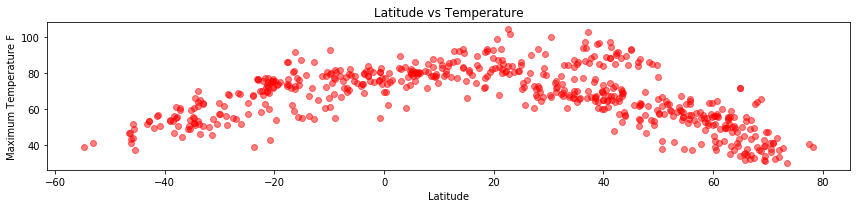

In [12]:
# Set maximum x value 
x_limit = 80
plt.figure(figsize=(12,3))
plt.scatter(weather_df["Lat"], weather_df["Maximum Temp"], color='r', alpha=0.5)

#Add title and labels
plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature F")
plt.tight_layout()
plt.savefig("../output_data/lat_vs_temp.png")
plt.show()

Based on this data is easy to see (as expected) that the closer you are to the equator, the higher temperatures tend to be.

## Latitude vs. Humidity Plot

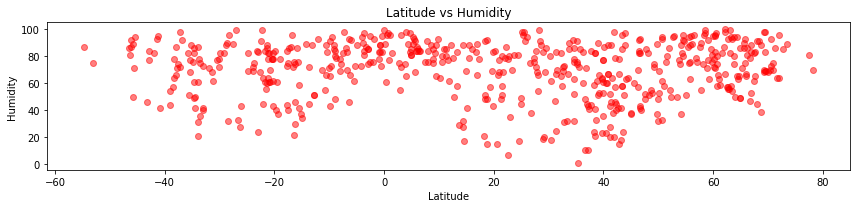

In [13]:
# Set maximum x value 
x_limit = 80
plt.figure(figsize=(12,3))
plt.scatter(weather_df["Lat"], weather_df["Humidity"], color='r', alpha=0.5)

#Add title and labels
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.tight_layout()
plt.savefig("../output_data/lat_vs_humidity.png")
plt.show()

Based on this figure there does not seem to be a correlation between humidity and proximity to the equator.

## Latitude vs. Cloudiness Plot

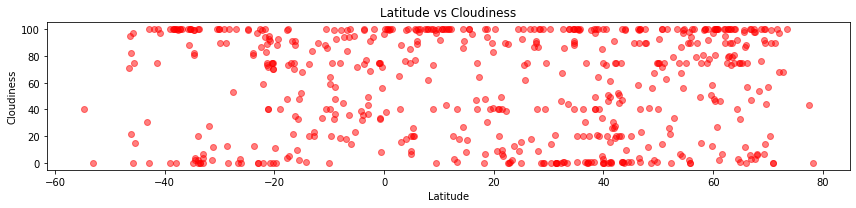

In [14]:
# Set maximum x value 
x_limit = 80
plt.figure(figsize=(12,3))
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], color='r', alpha=0.5)

#Add title and labels
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.tight_layout()
plt.savefig("../output_data/lat_vs_clouds.png")
plt.show()

Based on this figure there does not seem to be a correlation between cloudiness and proximity to the equator.

## Latitude vs. Wind Speed Plot

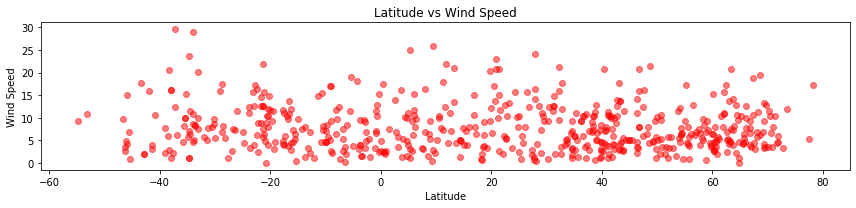

In [15]:
# Set maximum x value 
x_limit = 80
plt.figure(figsize=(12,3))
plt.scatter(weather_df["Lat"], weather_df["Wind"], color='r', alpha=0.5)

#Add title and labels
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.tight_layout()
plt.savefig("../output_data/lat_vs_wind.png")
plt.show()

Based on this figure there does not seem to be a correlation between wind speed and proximity to the equator.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

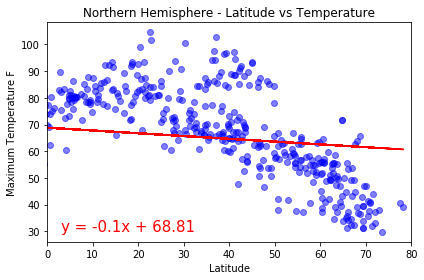

In [24]:
# Set limits and generate scatterplot
plt.xlim(0, 80)
plt.scatter(weather_df["Lat"], weather_df["Maximum Temp"], color='b', alpha=0.5)

#Add regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_df["Lat"], weather_df["Maximum Temp"])
regress_values = weather_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(weather_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(3,30),fontsize=15,color="red")

#Add title and labels
plt.title("Northern Hemisphere - Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature F")
plt.tight_layout()
plt.savefig("../output_data/northern_lat_vs_temp.png")
plt.show()

As expected, this plot shos that temperatures trend down as you move away from the equator. That said, it is interesting to note that the highest temperature do not occor right along the equator, but in the 20-40 longitude range.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

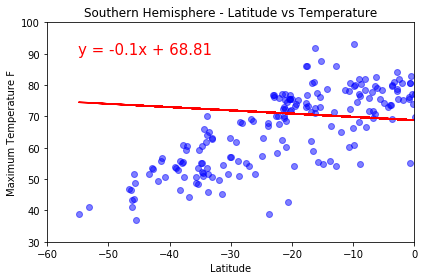

In [27]:
# Set limits and generate scatterplot
plt.xlim(-60, 0)
plt.ylim(30, 100)
plt.scatter(weather_df["Lat"], weather_df["Maximum Temp"], color='b', alpha=0.5)

#Add regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_df["Lat"], weather_df["Maximum Temp"])
regress_values = weather_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(weather_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55, 90),fontsize=15,color="red")

#Add title and labels
plt.title("Southern Hemisphere - Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature F")
plt.tight_layout()
plt.savefig("../output_data/southern_lat_vs_temp.png")
plt.show()

In much the same way as the previous figure shows, this one shows an increase in temperature as you approach the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

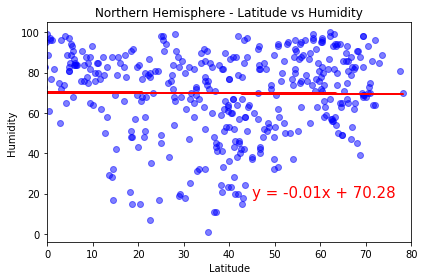

In [28]:
# Set limits and generate scatterplot
plt.xlim(0, 80)
plt.scatter(weather_df["Lat"], weather_df["Humidity"], color='b', alpha=0.5)

#Add regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_df["Lat"], weather_df["Humidity"])
regress_values = weather_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(weather_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(45, 18),fontsize=15,color="red")

#Add title and labels
plt.title("Northern Hemisphere - Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.tight_layout()
plt.savefig("../output_data/northern_lat_vs_humidity.png")
plt.show()

This almost completely flat trend line reinforces the previous analysis that there is no correlation between humidity and proximity to the equator.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

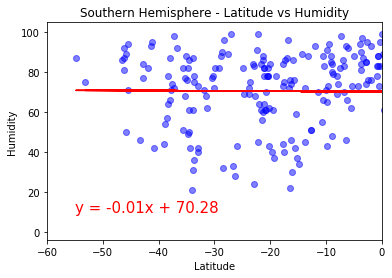

In [30]:
# Set limits and generate scatterplot
plt.xlim(-60, 0)
plt.scatter(weather_df["Lat"], weather_df["Humidity"], color='b', alpha=0.5)

#Add regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_df["Lat"], weather_df["Humidity"])
regress_values = weather_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(weather_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55, 10),fontsize=15,color="red")

#Add title and labels
plt.title("Southern Hemisphere - Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("../output_data/southern_lat_vs_humidity.png")
plt.show()

This almost completely flat trend line also reinforces the previous analysis that there is no correlation between humidity and proximity to the equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

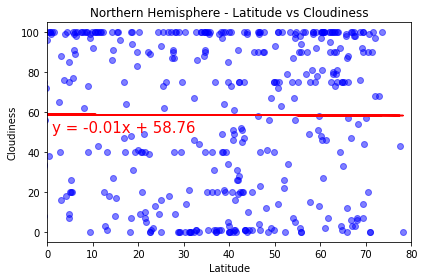

In [36]:
# Set limits and generate scatterplot
plt.xlim(0, 80)
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], color='b', alpha=0.5)

#Add regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_df["Lat"], weather_df["Cloudiness"])
regress_values = weather_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(weather_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(1, 50),fontsize=15,color="red")

#Add title and labels
plt.title("Northern Hemisphere - Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.tight_layout()
plt.savefig("../output_data/northern_lat_vs_cloudiness.png")
plt.show()

This almost completely flat trend line also reinforces the previous analysis that there is no correlation between cloudiness and proximity to the equator.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

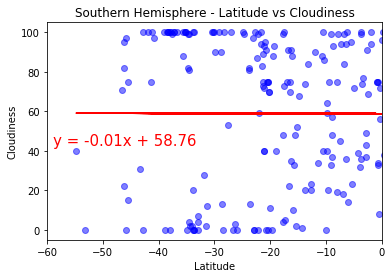

In [38]:
# Set limits and generate scatterplot
plt.xlim(-60, 0)
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], color='b', alpha=0.5)

#Add regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_df["Lat"], weather_df["Cloudiness"])
regress_values = weather_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(weather_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-59, 43),fontsize=15,color="red")

#Add title and labels
plt.title("Southern Hemisphere - Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../output_data/southern_lat_vs_cloudiness.png")
plt.show()

This almost completely flat trend line also reinforces the previous analysis that there is no correlation between cloudiness and proximity to the equator.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

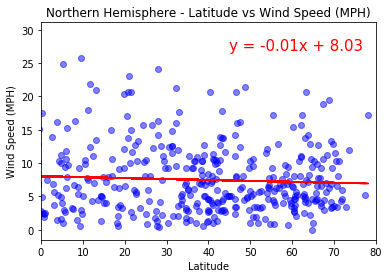

In [40]:
# Set limits and generate scatterplot
plt.xlim(0, 80)
plt.scatter(weather_df["Lat"], weather_df["Wind"], color='b', alpha=0.5)

#Add regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_df["Lat"], weather_df["Wind"])
regress_values = weather_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(weather_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(45, 27),fontsize=15,color="red")

#Add title and labels
plt.title("Northern Hemisphere - Latitude vs Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.savefig("../output_data/northern_lat_vs_wind.png")
plt.show()

This almost completely flat trend line also reinforces the previous analysis that there is no correlation between wind speed and proximity to the equator.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

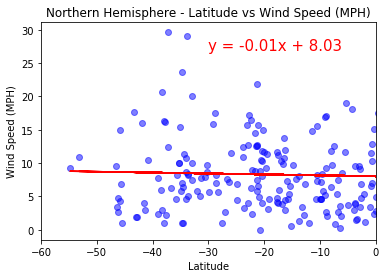

In [42]:
# Set limits and generate scatterplot
plt.xlim(-60, 0)
plt.scatter(weather_df["Lat"], weather_df["Wind"], color='b', alpha=0.5)

#Add regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_df["Lat"], weather_df["Wind"])
regress_values = weather_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(weather_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-30, 27),fontsize=15,color="red")

#Add title and labels
plt.title("Northern Hemisphere - Latitude vs Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.savefig("../output_data/southern_lat_vs_wind.png")
plt.show()

This almost completely flat trend line also reinforces the previous analysis that there is no correlation between wind speed and proximity to the equator.